# Search: Solving a Maze Using a Goal-based Agent

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [1]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`. 

In [2]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

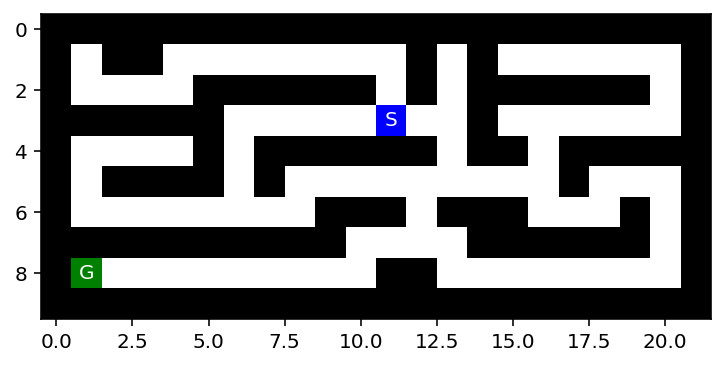

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [4]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [5]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    /Users/sofiamurillosanchez/Documents/GitHub/CS7320-AI/Search/maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [6]:
import numpy as np
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)
    
    # Heuristic Value h(n)
    def manhattan_distance(self):
        node = self
        curr_pos = node.pos
        pos = list(curr_pos)
        
        final_pos = mh.find_pos(maze, what = "G")
        f_pos = list(final_pos)
        
        x = abs(pos[0] - f_pos[0])
        y = abs(pos[1] - f_pos[1])
        
        return x+y

    def a_star_f(self):
        node = self
        return manhattan_distance(node) + node.cost
        

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../Python_Code_Examples/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the 
    - [small maze](small_maze.txt), 
    - [medium maze](medium_maze.txt), 
    - [large maze](large_maze.txt), 
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate. 

*Note:* You can swich the next block from code to Markdown and use formating.

### **Initial State:** Starting Position in the maze


### **Actions** - Moving either Left, Right, Up, or Down through the maze

### **Transition Model** - The transition model for the maze is dependent on the number of possible positions within the maze multiplied by the number of possible directions that can be followed (North, South, East, and West), therefore, four directions. 
𝑓: 𝑆 × 𝐴 → 𝑆


### **Goal State** - The maze is completed/exited

### **Path Cost** - 1 per step cost

In [7]:
actions = ['left', 'right', 'up', 'down', 'none']

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determine these values for a given maze.

In [8]:
# Your answer goes here

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore. 
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [9]:
# Function to check if the goal was reached by the current node
def goal_reached(position):
    if(position.pos == mh.find_pos(maze, what = "G")):
        return True
    else:
        return False

In [10]:
# Function to expand the search tree

def expand(curr_node):
    curr_pos = curr_node.pos
    pos = list(curr_pos)
    
    # Create node for moving to the right
    if(pos[0]+1 != 'X'):
        if pos[0]+1 < len(maze[0])-1:
            yield Node(tuple([pos[0]+1, pos[1]]), curr_node, 'right', curr_node.cost+1)
    
    # Create node for moving to the left
    if(pos[0]-1 != 'X'):
        if pos[0]-1 > 0:
            yield Node(tuple([pos[0]-1, pos[1]]), curr_node, 'left', curr_node.cost+1)
    
    # Create node for moving to the down
    if(pos[1]+1 != 'X'):
        if pos[1]+1 < len(maze)-1:
            yield Node(tuple([pos[0], pos[1]+1]), curr_node, 'down', curr_node.cost+1)
    
    # Create node for moving to the up
    if(pos[1]-1 != 'X'):
        if pos[1]-1 > 0:
            yield Node(tuple([pos[0], pos[1]-1]), curr_node, 'up', curr_node.cost+1)


In [11]:
# Declare global variables for data tracking purposes
num_expanded = 0
max_nodes = 1
max_depth = 0
max_frontier = 0

### Breadth First Search Implementation

In [12]:
def breadth_first(position, verbose = True):
    global num_expanded
    global max_nodes
    global max_depth
    global max_frontier
    
    if (goal_reached(position) == True):
        if verbose: print("Goal Reached!")
        return position    
    
    initial_pos = position.pos # Initial position of the starting node
    frontier = [position] # Initialize frontier with starting node
    max_frontier = 1 # Set frontier to 1
    reached = {initial_pos} # Initialize reached as a lookup table
    
    while len(frontier) != 0:
        curr = frontier.pop(0)
        num_expanded += 1 # Increase number expanded
        if verbose: print(curr)
        
        for child in expand(curr):
            max_nodes += 1
            if goal_reached(child) == True:
                if verbose: print("Goal Reached!")
                max_depth = len(child.get_path_from_root())
                return child
            if child.pos not in reached:
                reached.add(child.pos)
                frontier.append(child)
                max_frontier += 1 # Add node to frontier
    print("No solution found. Failed. :(")

In [13]:
maze = mh.parse_maze(maze_str)
position = Node((mh.find_pos(maze, what = "S")), None, 'none', 0) # Initialize starting/root node

print("Path Taken: ")
for node in breadth_first(position, False).get_path_from_root():
    maze[node.pos] = 'P'
    print(node)


Path Taken: 
Node - pos = (3, 11); action = none; cost = 0
Node - pos = (4, 11); action = right; cost = 1
Node - pos = (5, 11); action = right; cost = 2
Node - pos = (6, 11); action = right; cost = 3
Node - pos = (7, 11); action = right; cost = 4
Node - pos = (8, 11); action = right; cost = 5
Node - pos = (8, 10); action = up; cost = 6
Node - pos = (8, 9); action = up; cost = 7
Node - pos = (8, 8); action = up; cost = 8
Node - pos = (8, 7); action = up; cost = 9
Node - pos = (8, 6); action = up; cost = 10
Node - pos = (8, 5); action = up; cost = 11
Node - pos = (8, 4); action = up; cost = 12
Node - pos = (8, 3); action = up; cost = 13
Node - pos = (8, 2); action = up; cost = 14
Node - pos = (8, 1); action = up; cost = 15


### Depth First Search Implementation

In [14]:
def is_cycle(position):
    cnt = 0
    if position.parent != None:
        for node in position.parent.get_path_from_root():
            if node.pos == position.pos:
                cnt+=1
            if(cnt > 0):
                return True
    return False

In [15]:
def depth_first(position, l=float('inf'), verbose = True):
    global num_expanded
    global max_nodes
    global max_depth
    global max_frontier
    frontier = [position] # Initialize frontier with starting node
    max_frontier = 1
    
    while frontier:
        curr = frontier.pop()
        
        if (goal_reached(curr) == True):
            if verbose: print("Goal Reached!")
            max_depth = len(curr.get_path_from_root())
            return curr # Goal Position
        
        if(curr.cost > l):
            return curr # Cutoff
        
        
        elif not is_cycle(curr):
            poss_nodes = expand(curr)
            num_expanded += 1
            for child in poss_nodes:
                max_nodes += 1
                if(verbose): print(child)
                frontier.append(child)
                max_frontier += 1
    print("Failed... Final Position: ")
    return position 

In [16]:
maze = mh.parse_maze(maze_str)
position = Node((mh.find_pos(maze, what = "S")), None, 'none', 0) # Initialize starting/root node

print("Path Taken: ")
for node in depth_first(position, float('inf'), False).get_path_from_root():
    maze[node.pos] = 'P'
    print(node)

Path Taken: 
Node - pos = (3, 11); action = none; cost = 0
Node - pos = (3, 10); action = up; cost = 1
Node - pos = (3, 9); action = up; cost = 2
Node - pos = (3, 8); action = up; cost = 3
Node - pos = (3, 7); action = up; cost = 4
Node - pos = (3, 6); action = up; cost = 5
Node - pos = (3, 5); action = up; cost = 6
Node - pos = (3, 4); action = up; cost = 7
Node - pos = (3, 3); action = up; cost = 8
Node - pos = (3, 2); action = up; cost = 9
Node - pos = (3, 1); action = up; cost = 10
Node - pos = (4, 1); action = right; cost = 11
Node - pos = (4, 2); action = down; cost = 12
Node - pos = (4, 3); action = down; cost = 13
Node - pos = (4, 4); action = down; cost = 14
Node - pos = (4, 5); action = down; cost = 15
Node - pos = (4, 6); action = down; cost = 16
Node - pos = (4, 7); action = down; cost = 17
Node - pos = (4, 8); action = down; cost = 18
Node - pos = (5, 8); action = right; cost = 19
Node - pos = (5, 7); action = up; cost = 20
Node - pos = (5, 6); action = up; cost = 21
Node 

## How does BFS and DFS deal with loops (cycles)?

**Breadth First Search:** BFS uses the reached data structure to keep track of the current path and ensure that the current node is not already contained.



**Depth First Search:** DFS checks the current path from the root using the node that it is currently checking. The data reached isn't specifically stored in a data structure.

# NEED TO ANSWER

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

In [17]:
# Discussion

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

# Greedy Best-First Search

In [18]:
def greedy_best_first(position, heuristic, verbose):
    global num_expanded
    global max_nodes
    global max_depth
    global max_frontier
    initial_pos = position.pos # Initial position of the starting node
    frontier = [position] # Initialize frontier as a priority queue
    max_frontier = 1
    reached = {initial_pos: position} # Initialize reached as a lookup table
    
    while frontier:
        curr = frontier.pop(0)
        
        if goal_reached(curr):
            max_depth = len(curr.get_path_from_root())
            return curr
        
        num_expanded +=1
        for child in expand(curr):
            max_nodes += 1
            if child.pos not in reached or child.cost < reached.get(child.pos).cost:
                reached[child.pos] = child
                frontier.append(child)
                max_frontier += 1
        
        # Order the frontier by heuristic, with the smallest manhattan distance being the priority
        frontier.sort(key=lambda x: x.manhattan_distance())
                
                
    print("No Solution Found. Failed. :(")
    

In [19]:
maze = mh.parse_maze(maze_str)
position = Node((mh.find_pos(maze, what = "S")), None, 'none', 0) # Initialize starting/root node
print("Path Taken: ")
heuristic = position.manhattan_distance()

for node in greedy_best_first(position, heuristic, False).get_path_from_root():
    maze[node.pos] = 'P'
    print(node)

Path Taken: 
Node - pos = (3, 11); action = none; cost = 0
Node - pos = (4, 11); action = right; cost = 1
Node - pos = (5, 11); action = right; cost = 2
Node - pos = (6, 11); action = right; cost = 3
Node - pos = (7, 11); action = right; cost = 4
Node - pos = (8, 11); action = right; cost = 5
Node - pos = (8, 10); action = up; cost = 6
Node - pos = (8, 9); action = up; cost = 7
Node - pos = (8, 8); action = up; cost = 8
Node - pos = (8, 7); action = up; cost = 9
Node - pos = (8, 6); action = up; cost = 10
Node - pos = (8, 5); action = up; cost = 11
Node - pos = (8, 4); action = up; cost = 12
Node - pos = (8, 3); action = up; cost = 13
Node - pos = (8, 2); action = up; cost = 14
Node - pos = (8, 1); action = up; cost = 15


# A* Search

In [20]:
def a_star(position, heuristic, verbose):
    global num_expanded
    global max_nodes
    global max_depth
    global max_frontier
    initial_pos = position.pos # Initial position of the starting node
    frontier = [position] # Initialize frontier as a priority queue
    max_frontier = 1
    reached = {initial_pos: position} # Initialize reached as a lookup table
    
    while frontier:
        curr = frontier.pop(0)
        
        if goal_reached(curr):
            max_depth = len(curr.get_path_from_root())
            return curr
        num_expanded += 1
        for child in expand(curr):
            max_nodes += 1
            if child.pos not in reached or child.cost < reached.get(child.pos).cost:
                reached[child.pos] = child
                frontier.append(child)
                max_frontier += 1
        
        # Order the frontier by heuristic, with the smallest (manhattan distance + path cost) being the priority
        current_check = frontier[len(frontier) - 1]
        frontier.sort(key=lambda x: (x.manhattan_distance()+x.cost))
                
                
    print("No Solution Found. Failed. :(")

In [21]:
maze = mh.parse_maze(maze_str)
position = Node((mh.find_pos(maze, what = "S")), None, 'none', 0) # Initialize starting/root node
print("Path Taken: ")
heuristic = position.manhattan_distance() + 0 # g(n) = 0 since it is at the starting node, so current path cost is 0

for node in a_star(position, heuristic, False).get_path_from_root():
    maze[node.pos] = 'P'
    print(node)

Path Taken: 
Node - pos = (3, 11); action = none; cost = 0
Node - pos = (4, 11); action = right; cost = 1
Node - pos = (5, 11); action = right; cost = 2
Node - pos = (6, 11); action = right; cost = 3
Node - pos = (7, 11); action = right; cost = 4
Node - pos = (8, 11); action = right; cost = 5
Node - pos = (8, 10); action = up; cost = 6
Node - pos = (8, 9); action = up; cost = 7
Node - pos = (8, 8); action = up; cost = 8
Node - pos = (8, 7); action = up; cost = 9
Node - pos = (8, 6); action = up; cost = 10
Node - pos = (8, 5); action = up; cost = 11
Node - pos = (8, 4); action = up; cost = 12
Node - pos = (8, 3); action = up; cost = 13
Node - pos = (8, 2); action = up; cost = 14
Node - pos = (8, 1); action = up; cost = 15


Are your implementations complete and optimal? What is the time and space complexity?

In [22]:
# Discussion

## Task 4: Comparison and discussion [20 Points] 

Run experiments to compare the implemented algorithms.


### My Thoughts/Comments:

For the experiments I ran, I ran all the algorithm implementations through the different mazes and produced their respective output through pretty table to compare their general performance and other variables we were asked to calculate (i.e. max number of nodes in memory).

I specifically calculated each variable with the following logic:
1) **Num Expanded:** If a node was not the result, right before it went through the expansion function, I incremented its value since technically that's the node being expanded.

2) **Max Nodes:** To calculate this, I initialized max nodes to 1 since we have a root node. From there, I incremented max nodes by 1 when looping through the expanded children since those are technically all of the nodes in memory to be considered.

3) **Max Depth:** I did not want to go through the trouble of exploring the longest possible path, so, I set the max depth to the length of the final path.

4) **Max Frontier:** I incremented Max Frontier by 1 each time a node was added to the frontier.

In [23]:
# Read in the mazes
with open("small_maze.txt", "r") as f:
    small_maze = f.read()

with open("medium_maze.txt", "r") as f:
    medium_maze = f.read()
    
with open("large_maze.txt", "r") as f:
    large_maze = f.read()
    
with open("open_maze.txt", "r") as f:
    open_maze = f.read()
    
with open("wall_maze.txt", "r") as f:
    wall_maze = f.read()
    
with open("loops_maze.txt", "r") as f:
    loops_maze = f.read()

with open("empty_maze.txt", "r") as f:
    empty_maze = f.read()

with open("empty_2_maze.txt", "r") as f:
    empty_2_maze = f.read()

In [24]:
def reset_global_vars():
    global num_expanded
    num_expanded = 0
    global max_nodes 
    max_nodes = 1
    global max_depth 
    max_depth = 0
    global max_frontier 
    max_frontier = 0

In [25]:
from prettytable import PrettyTable

In [26]:
# Small Maze Data Collection
maze = mh.parse_maze(small_maze)
small = PrettyTable()
position = Node((mh.find_pos(maze, what = "S")), None, 'none', 0) # Initialize starting/root node


# BFS
small.add_row(['BFS', breadth_first(position, False).cost, num_expanded,max_depth, max_nodes, max_frontier])

# Reset values
reset_global_vars()

# DFS
maze = mh.parse_maze(small_maze)
small.add_row(['DFS', depth_first(position, float('inf'), False).cost, num_expanded, max_depth, max_nodes, max_frontier])


reset_global_vars()

# GBS
maze = mh.parse_maze(small_maze)
small.add_row(['GBS', greedy_best_first(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])# Max frontier size


reset_global_vars()

# A*
maze = mh.parse_maze(small_maze)
heuristic = position.manhattan_distance() + 0 # g(n) = 0 since it is at the starting node, so current path cost is 0
small.add_row(['A*', a_star(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])

reset_global_vars()

# display table
small.field_names = ['algo', 'path cost', 'nodes expanded', 'max tree depth', 'max # of nodes', 'max frontier size']
print(small)

+------+-----------+----------------+----------------+----------------+-------------------+
| algo | path cost | nodes expanded | max tree depth | max # of nodes | max frontier size |
+------+-----------+----------------+----------------+----------------+-------------------+
| BFS  |     15    |      1142      |       16       |      3713      |        142        |
| DFS  |     43    |      800       |       44       |      2541      |        2541       |
| GBS  |     15    |       15       |       16       |       52       |         40        |
|  A*  |     15    |       65       |       16       |      232       |         87        |
+------+-----------+----------------+----------------+----------------+-------------------+


In [27]:
# Medium Maze Data Collection
maze = mh.parse_maze(medium_maze)
med = PrettyTable()
position = Node((mh.find_pos(maze, what = "S")), None, 'none', 0) # Initialize starting/root node


# BFS
med.add_row(['BFS', breadth_first(position, False).cost, num_expanded,max_depth, max_nodes, max_frontier])

# Reset values
reset_global_vars()

# DFS
maze = mh.parse_maze(small_maze)
med.add_row(['DFS', depth_first(position, float('inf'), False).cost, num_expanded, max_depth, max_nodes, max_frontier])


reset_global_vars()

# GBS
maze = mh.parse_maze(small_maze)
med.add_row(['GBS', greedy_best_first(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])# Max frontier size


reset_global_vars()

# A*
maze = mh.parse_maze(small_maze)
heuristic = position.manhattan_distance() + 0 # g(n) = 0 since it is at the starting node, so current path cost is 0
med.add_row(['A*', a_star(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])

reset_global_vars()

# display table
med.field_names = ['algo', 'path cost', 'nodes expanded', 'max tree depth', 'max # of nodes', 'max frontier size']
print(med)

+------+-----------+----------------+----------------+----------------+-------------------+
| algo | path cost | nodes expanded | max tree depth | max # of nodes | max frontier size |
+------+-----------+----------------+----------------+----------------+-------------------+
| BFS  |     48    |      965       |       49       |      3162      |        984        |
| DFS  |     82    |       82       |       83       |      255       |        255        |
| GBS  |     40    |       40       |       41       |      126       |        112        |
|  A*  |     40    |      271       |       41       |      828       |        305        |
+------+-----------+----------------+----------------+----------------+-------------------+


In [28]:
# Large Maze Data Collection
maze = mh.parse_maze(large_maze)
large = PrettyTable()
position = Node((mh.find_pos(maze, what = "S")), None, 'none', 0) # Initialize starting/root node


# BFS
large.add_row(['BFS', breadth_first(position, False).cost, num_expanded,max_depth, max_nodes, max_frontier])

# Reset values
reset_global_vars()

# DFS
maze = mh.parse_maze(small_maze)
large.add_row(['DFS', depth_first(position, float('inf'), False).cost, num_expanded, max_depth, max_nodes, max_frontier])


reset_global_vars()

# GBS
maze = mh.parse_maze(small_maze)
large.add_row(['GBS', greedy_best_first(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])# Max frontier size


reset_global_vars()

# A*
maze = mh.parse_maze(small_maze)
heuristic = position.manhattan_distance() + 0 # g(n) = 0 since it is at the starting node, so current path cost is 0
large.add_row(['A*', a_star(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])

reset_global_vars()

# display table
large.field_names = ['algo', 'path cost', 'nodes expanded', 'max tree depth', 'max # of nodes', 'max frontier size']
print(large)

+------+-----------+----------------+----------------+----------------+-------------------+
| algo | path cost | nodes expanded | max tree depth | max # of nodes | max frontier size |
+------+-----------+----------------+----------------+----------------+-------------------+
| BFS  |     34    |      595       |       35       |      2313      |        629        |
| DFS  |    243    |      243       |      244       |      737       |        737        |
| GBS  |     61    |       61       |       62       |      174       |        155        |
|  A*  |     61    |      979       |       62       |      2546      |        1014       |
+------+-----------+----------------+----------------+----------------+-------------------+


In [29]:
# Open Maze Data Collection
maze = mh.parse_maze(open_maze)
openM = PrettyTable()
position = Node((mh.find_pos(maze, what = "S")), None, 'none', 0) # Initialize starting/root node


# BFS
openM.add_row(['BFS', breadth_first(position, False).cost, num_expanded,max_depth, max_nodes, max_frontier])

# Reset values
reset_global_vars()

# DFS
maze = mh.parse_maze(small_maze)
openM.add_row(['DFS', depth_first(position, float('inf'), False).cost, num_expanded, max_depth, max_nodes, max_frontier])


reset_global_vars()

# GBS
maze = mh.parse_maze(small_maze)
openM.add_row(['GBS', greedy_best_first(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])# Max frontier size


reset_global_vars()

# A*
maze = mh.parse_maze(small_maze)
heuristic = position.manhattan_distance() + 0 # g(n) = 0 since it is at the starting node, so current path cost is 0
openM.add_row(['A*', a_star(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])

reset_global_vars()

# display table
openM.field_names = ['algo', 'path cost', 'nodes expanded', 'max tree depth', 'max # of nodes', 'max frontier size']
print(openM)

+------+-----------+----------------+----------------+----------------+-------------------+
| algo | path cost | nodes expanded | max tree depth | max # of nodes | max frontier size |
+------+-----------+----------------+----------------+----------------+-------------------+
| BFS  |     54    |      1104      |       55       |      3818      |        1119       |
| DFS  |     83    |       83       |       84       |      257       |        257        |
| GBS  |     41    |       41       |       42       |      129       |        115        |
|  A*  |     41    |      279       |       42       |      851       |        314        |
+------+-----------+----------------+----------------+----------------+-------------------+


In [30]:
# Wall Maze Data Collection
maze = mh.parse_maze(wall_maze)
wallM = PrettyTable()
position = Node((mh.find_pos(maze, what = "S")), None, 'none', 0) # Initialize starting/root node


# BFS
wallM.add_row(['BFS', breadth_first(position, False).cost, num_expanded,max_depth, max_nodes, max_frontier])

# Reset values
reset_global_vars()

# DFS
maze = mh.parse_maze(small_maze)
wallM.add_row(['DFS', depth_first(position, float('inf'), False).cost, num_expanded, max_depth, max_nodes, max_frontier])


reset_global_vars()

# GBS
maze = mh.parse_maze(small_maze)
wallM.add_row(['GBS', greedy_best_first(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])# Max frontier size


reset_global_vars()

# A*
maze = mh.parse_maze(small_maze)
heuristic = position.manhattan_distance() + 0 # g(n) = 0 since it is at the starting node, so current path cost is 0
wallM.add_row(['A*', a_star(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])

reset_global_vars()

# display table
wallM.field_names = ['algo', 'path cost', 'nodes expanded', 'max tree depth', 'max # of nodes', 'max frontier size']
print(wallM)

+------+-----------+----------------+----------------+----------------+-------------------+
| algo | path cost | nodes expanded | max tree depth | max # of nodes | max frontier size |
+------+-----------+----------------+----------------+----------------+-------------------+
| BFS  |     14    |       92       |       15       |      335       |         95        |
| DFS  |     2     |       2        |       3        |       8        |         8         |
| GBS  |     2     |       2        |       3        |       9        |         8         |
|  A*  |     2     |       3        |       3        |       12       |         9         |
+------+-----------+----------------+----------------+----------------+-------------------+


In [31]:
# loops Maze Data Collection
maze = mh.parse_maze(loops_maze)
loopsM = PrettyTable()
position = Node((mh.find_pos(maze, what = "S")), None, 'none', 0) # Initialize starting/root node


# BFS
loopsM.add_row(['BFS', breadth_first(position, False).cost, num_expanded,max_depth, max_nodes, max_frontier])

# Reset values
reset_global_vars()

# DFS
maze = mh.parse_maze(small_maze)
loopsM.add_row(['DFS', depth_first(position, float('inf'), False).cost, num_expanded, max_depth, max_nodes, max_frontier])


reset_global_vars()

# GBS
maze = mh.parse_maze(small_maze)
loopsM.add_row(['GBS', greedy_best_first(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])# Max frontier size


reset_global_vars()

# A*
maze = mh.parse_maze(small_maze)
heuristic = position.manhattan_distance() + 0 # g(n) = 0 since it is at the starting node, so current path cost is 0
loopsM.add_row(['A*', a_star(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])

reset_global_vars()

# display table
loopsM.field_names = ['algo', 'path cost', 'nodes expanded', 'max tree depth', 'max # of nodes', 'max frontier size']
print(loopsM)

+------+-----------+----------------+----------------+----------------+-------------------+
| algo | path cost | nodes expanded | max tree depth | max # of nodes | max frontier size |
+------+-----------+----------------+----------------+----------------+-------------------+
| BFS  |     9     |       37       |       10       |      131       |         45        |
| DFS  |     16    |       16       |       17       |       61       |         61        |
| GBS  |     2     |       2        |       3        |       7        |         6         |
|  A*  |     2     |       2        |       3        |       7        |         6         |
+------+-----------+----------------+----------------+----------------+-------------------+


In [32]:
# Empty Maze Data Collection
maze = mh.parse_maze(empty_maze)
emptyM = PrettyTable()
position = Node((mh.find_pos(maze, what = "S")), None, 'none', 0) # Initialize starting/root node


# BFS
emptyM.add_row(['BFS', breadth_first(position, False).cost, num_expanded,max_depth, max_nodes, max_frontier])

# Reset values
reset_global_vars()

# DFS
maze = mh.parse_maze(small_maze)
emptyM.add_row(['DFS', depth_first(position, float('inf'), False).cost, num_expanded, max_depth, max_nodes, max_frontier])


reset_global_vars()

# GBS
maze = mh.parse_maze(small_maze)
emptyM.add_row(['GBS', greedy_best_first(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])# Max frontier size


reset_global_vars()

# A*
maze = mh.parse_maze(small_maze)
heuristic = position.manhattan_distance() + 0 # g(n) = 0 since it is at the starting node, so current path cost is 0
emptyM.add_row(['A*', a_star(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])

reset_global_vars()

# display table
emptyM.field_names = ['algo', 'path cost', 'nodes expanded', 'max tree depth', 'max # of nodes', 'max frontier size']
print(emptyM)

+------+-----------+----------------+----------------+----------------+-------------------+
| algo | path cost | nodes expanded | max tree depth | max # of nodes | max frontier size |
+------+-----------+----------------+----------------+----------------+-------------------+
| BFS  |     14    |       92       |       15       |      335       |         95        |
| DFS  |     2     |       2        |       3        |       8        |         8         |
| GBS  |     2     |       2        |       3        |       9        |         8         |
|  A*  |     2     |       3        |       3        |       12       |         9         |
+------+-----------+----------------+----------------+----------------+-------------------+


In [33]:
# Empty Maze 2 Data Collection
maze = mh.parse_maze(empty_2_maze)
empty2M = PrettyTable()
position = Node((mh.find_pos(maze, what = "S")), None, 'none', 0) # Initialize starting/root node


# BFS
empty2M.add_row(['BFS', breadth_first(position, False).cost, num_expanded,max_depth, max_nodes, max_frontier])

# Reset values
reset_global_vars()

# DFS
maze = mh.parse_maze(small_maze)
empty2M.add_row(['DFS', depth_first(position, float('inf'), False).cost, num_expanded, max_depth, max_nodes, max_frontier])


reset_global_vars()

# GBS
maze = mh.parse_maze(small_maze)
empty2M.add_row(['GBS', greedy_best_first(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])# Max frontier size


reset_global_vars()

# A*
maze = mh.parse_maze(small_maze)
heuristic = position.manhattan_distance() + 0 # g(n) = 0 since it is at the starting node, so current path cost is 0
empty2M.add_row(['A*', a_star(position, heuristic, False).cost, num_expanded, max_depth, max_nodes, max_frontier])

reset_global_vars()

# display table
empty2M.field_names = ['algo', 'path cost', 'nodes expanded', 'max tree depth', 'max # of nodes', 'max frontier size']
print(empty2M)

+------+-----------+----------------+----------------+----------------+-------------------+
| algo | path cost | nodes expanded | max tree depth | max # of nodes | max frontier size |
+------+-----------+----------------+----------------+----------------+-------------------+
| BFS  |     14    |       92       |       15       |      336       |         95        |
| DFS  |     56    |       64       |       57       |      233       |        233        |
| GBS  |     14    |       14       |       15       |       49       |         36        |
|  A*  |     14    |       62       |       15       |      229       |         80        |
+------+-----------+----------------+----------------+----------------+-------------------+


Present the results as using charts (see [Python Code Examples/charts and tables](../Python_Code_Examples/charts_and_tables.ipynb)). 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# Create dataframes with the different tables

df_small = pd.DataFrame.from_records(small.rows, columns=small.field_names)
df_med = pd.DataFrame.from_records(med.rows, columns=med.field_names)
df_large = pd.DataFrame.from_records(large.rows, columns=large.field_names)
df_open = pd.DataFrame.from_records(openM.rows, columns=openM.field_names)
df_wall = pd.DataFrame.from_records(wallM.rows, columns=wallM.field_names)
df_loops = pd.DataFrame.from_records(loopsM.rows, columns=loopsM.field_names)
df_empty = pd.DataFrame.from_records(emptyM.rows, columns=emptyM.field_names)
df_empty2 = pd.DataFrame.from_records(empty2M.rows, columns=empty2M.field_names)

## Discuss the most important lessons you have learned from implementing the different search strategies. 

I never thought I would learn anything while implementing search algorithms if I am truly honest. However, I learned so much.

1) For starters, I learned the importance of bounds checking when implementing any form of a search strategy. I never realized the impact not checking a simple value could have on your ability to get the correct answer.

2) Something else I learned is the way the different search algorithms approach their implementations and the different use of data structures. For example, the frontier is consistently used in all of these implementations, but the reached data structure is not used in DFS. I consider this important because the way data structures are implemented (whether LIFO, FIFO, or not even used at all) is key to the way you reason your way through implementations.

3) I learned that heurisitics are not as difficult to calculate as they seem. In practice, they are more simple than what we're taught theoretically. I feel like I always overthink the heurisitic applicationn within a search implementation, but, after a lot of research, I realized that __heuristics are not that bad__.